<a href="https://colab.research.google.com/github/kkamal11/Machine-Learning__MLP/blob/main/Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline

#global matplotlib settings
mpl.rc('figure',figsize=(8,6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Week 1

['setosa' 'versicolor' 'virginica']
(200, 10) (200, 10)
(10, 2)


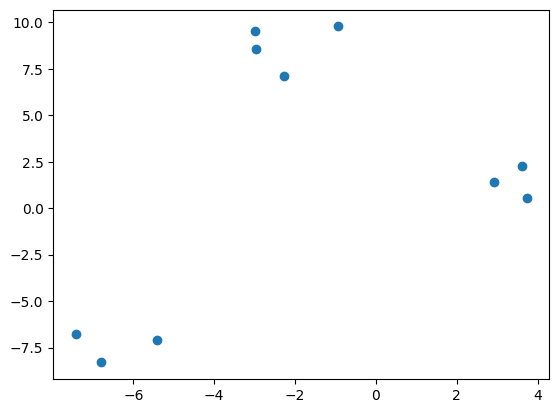

In [ ]:
#@title **Practice Assignment**
from sklearn.datasets import load_iris, make_regression, make_blobs
iris = load_iris()
# print(iris.DESCR)
print(iris['target_names'])

X, y = make_regression(n_samples=200, n_features=10, n_targets=10)
print(X.shape, y.shape)

X, y = make_blobs(n_samples=10, n_features=2, centers=3, random_state=42)
print(X.shape)

plt.scatter(X[:,0], X[:,1]);

In [ ]:
#@title **Graded Assignment**
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True, return_X_y=False)
X = data.data
print(X.shape)
print(data.DESCR)

(569, 30)
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is

# Week 2

(748, 6)
V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64
    V1    V2       V3    V4        V5 Target
0  2.0  50.0  12500.0  98.0  NEGATIVE    YES
1  0.0  13.0   3250.0  28.0  NEGATIVE    YES
2  NaN   NaN   4000.0  35.0  NEGATIVE    YES
3  NaN  20.0   5000.0  45.0  NEGATIVE    YES
4  1.0  24.0   6000.0  77.0  NEGATIVE     NO
V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64
    count         mean          std    min    25%     50%     75%      max
V1  743.0     9.562584     8.093527    0.0    3.0     8.0    14.0     74.0
V2  743.0     5.464334     5.799759    1.0    2.0     4.0     7.0     50.0
V3  748.0  1378.676471  1459.826781  250.0  500.0  1000.0  1750.0  12500.0
V4  748.0    34.282086    24.376714    2.0   16.0    28.0    50.0     98.0
NO     570
YES    178
Name: Target, dtype: int64
9.552139037433156 9.562584118438762
5.464333781965007


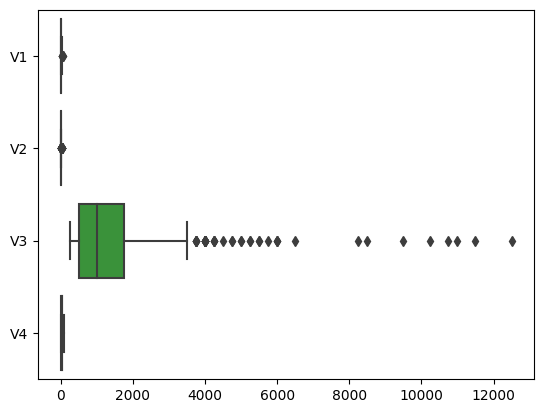

In [ ]:
#@title **Practice Assignment**
df = pd.read_csv("/content/DataPreprocessingGraded_dataset.csv", na_values="?")
print(df.shape)
print("========================")
print(df.isna().sum())
print("========================")
# df = df.dropna()

print(df.head())

print("========================")
print(df.isna().sum())
print("========================")
print(df.describe().T)
print("========================")

sns.boxplot(df, orient="h")

print(df['Target'].value_counts())

print("========================")
from sklearn.impute import SimpleImputer, KNNImputer
imp = SimpleImputer(strategy="median")
knni = KNNImputer(n_neighbors=3)
v1 = np.array(df['V1'])
v1_si = imp.fit_transform(v1.reshape(-1, 1))
v1_knni = knni.fit_transform(v1.reshape(-1, 1))
print(np.mean(v1_si), np.mean(v1_knni))


print("========================")
imp = SimpleImputer(strategy="mean")
v2 = np.array(df['V2'])
v2_si = imp.fit_transform(v2.reshape(-1, 1))
print(np.mean(v2_si))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

X = np.array([[1, 'yes'], [2, 'no'], [3, 'no']])
ct = ColumnTransformer([('scaler', MinMaxScaler(),[0]),
                        ('pass', 'passthrough',[0]),
                        ('encoder', OrdinalEncoder(),[1])])

print(ct.fit_transform(X))

[['0.0' '1' '1.0']
 ['0.5' '2' '0.0']
 ['1.0' '3' '0.0']]


In [ ]:
#@title **Graded Assignment**
df = pd.read_csv("/content/DataPreprocessingGraded_dataset.csv", na_values="?")
X = df.iloc[:,:-1]
y = df.pop("Target")

# Week 3

In [43]:
#@title **Practice Assignment**
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(as_frame=True, return_X_y = True)
print(X.shape)
print(X.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=False, test_size=0.2)
print(X_test.iloc[2,1])
print(X_train.iloc[0,4]) #first sample of trainset in population column
print(np.mean(y_train))
print(np.median(y_test))


scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_tr, y_train)

print(reg.coef_)
print(reg.intercept_)


#Using pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipe.fit(X_train, y_train)
print(pipe['reg'].coef_)
print(pipe['reg'].intercept_)

(20640, 8)
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
28.0
322.0
2.02067031310562
2.1475
[ 0.83817967  0.12032096 -0.32135834  0.36456599 -0.00170674 -0.04524631
 -0.87994217 -0.82634126]
2.020670313105614
[ 0.83817967  0.12032096 -0.32135834  0.36456599 -0.00170674 -0.04524631
 -0.87994217 -0.82634126]
2.020670313105614


In [44]:
#@title **Graded Assignment**
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, max_error

X, y = fetch_california_housing(as_frame=True, return_X_y = True)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, shuffle=False, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipe.fit(X_train, y_train)

X_test_tr = pipe['scaler'].transform(X_test)
reg = pipe['reg']
y_pred = reg.predict(X_test_tr)
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test, y_pred))
print(max_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', SGDRegressor(random_state=0))
])

pipe.fit(X_train, y_train)
reg = pipe['reg']
print(reg.intercept_)
print(pipe['reg'].coef_)

0.6605140591531993
0.7033383507521878
0.6605500501742703
7.260453292958372
0.5168526993787042
0.4946848356388075
[2.01123921]
[ 0.84046697  0.112331   -0.41213039  0.21595971 -0.01781887 -0.01480892
 -0.87394103 -0.83913104]


# Week 4

In [ ]:
#@title **Practice Assignment**
from sklearn.metrics import explained_variance_score
y_true = [7, 4, 9, 4]
y_pred = [8, 7, 12, 5]
print(explained_variance_score(y_true, y_pred))


def compute_explained_variance_score(y_true, y_pred):
    var_y = np.var(np.array(y_true))
    var_of_y_minus_y_pred = np.var(np.array(y_true) - np.array(y_pred))
    return 1 - (var_of_y_minus_y_pred / var_y)

print(compute_explained_variance_score(y_true, y_pred))



def compute_score(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import SGDRegressor
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler(with_mean=True, with_std=True)
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    sgd_reg = SGDRegressor(loss='squared_error', penalty='l1', alpha=0.01, random_state=1)
    sgd_reg.fit(X_train_norm, y_train)
    score = sgd_reg.score(X_test_norm, y_test)

    return round(score, 4)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(as_frame=True, return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(compute_score(X_train, y_train, X_test, y_test))


0.7777777777777778
0.7777777777777778
0.5951


In [ ]:
#@title **Graded Assignment**
def k_fold_cv(X):
    from sklearn.model_selection import RepeatedKFold
    ans = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
    split = 1
    for train, test in ans.split(X):
        print("split #%d, %s %s" % (split, train, test))
        split += 1
    array1=np.append(train, test)
    return array1


X = [[1, 2], [3, 4], [1, 2], [3, 4]]
print(k_fold_cv(X))

##################################################
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

ss = StandardScaler(with_mean=True, with_std=True)
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)
sgd_reg = SGDRegressor(random_state=1)

param_grid = {
    'loss':['squared_error', 'huber'],
    'penalty':['l1','l2'],
    'alpha':[0.1, 0.01, 0.001],
    'max_iter':[1000,2000,5000]
}
gcv = GridSearchCV(sgd_reg, param_grid, cv=4, return_train_score = True)
gcv.fit(X_train_norm, y_train)
print(sorted(gcv.cv_results_.keys()))
print(gcv.score(X_test_norm, y_test))
print(gcv.best_params_)
print(gcv.best_estimator_)

##################################################
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

ss = StandardScaler(with_mean=True, with_std=True)
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)
ridge_reg = Ridge(random_state=1)

param_grid = {
    'alpha':[0.5,0.1,0.05,0.01,0.005,0.001],
}
gcv = GridSearchCV(ridge_reg, param_grid, cv=4, return_train_score = True)
gcv.fit(X_train_norm, y_train)
print(gcv.score(X_test_norm, y_test))
print(gcv.best_params_)
print(gcv.best_estimator_)
##################################################
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ss = StandardScaler(with_mean=True, with_std=True)
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)
lasso_reg = Lasso(random_state=1)

param_grid = {
    'alpha':[0.5,0.1,0.05,0.01,0.005,0.001],
}
gcv = GridSearchCV(lasso_reg, param_grid, cv=6, return_train_score = True)
gcv.fit(X_train_norm, y_train)
print(gcv.score(X_test_norm, y_test))
print(gcv.best_params_)
print(gcv.best_estimator_)


split #1, [0 1] [2 3]
split #2, [2 3] [0 1]
split #3, [1 3] [0 2]
split #4, [0 2] [1 3]
[0 2 1 3]
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_alpha', 'param_loss', 'param_max_iter', 'param_penalty', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']
0.5951040704728553
{'alpha': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}
SGDRegressor(alpha=0.01, penalty='l1', random_state=1)
0.597145061224877
{'alpha': 0.5}
Ridge(alpha=0.5, random_state=1)
0.6047829320240279
{'alpha': 0.005}
Lasso(alpha=0.005, random_state=1)


# Week 5

In [ ]:
#@title **Practice Assignment**
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron

X, y = fetch_openml(name='mnist_784', version=1, as_frame=True, return_X_y=True)

X = X.to_numpy()
y = y.to_numpy(dtype=np.int32)
print(X.shape[0])
sample_2022 = X[2022,:]
print(y[2022], np.mean(sample_2022), np.sum(sample_2022.size - np.count_nonzero(sample_2022)))

X_train, y_train = X[:10_000], y[:10_000]
X_test, y_test = X[10_000:12_000], y[10_000:12_000]

print(len(np.unique(y_train)), np.sum(y_train == 6), np.sum(y_train == 9), len(np.unique(y_test)), pd.Series(y_test).value_counts().idxmax())

train_ind_6 = np.where(y_train == 6)[0]
test_ind_6 = np.where(y_test == 6)[0]
train_ind_9 = np.where(y_train == 9)[0]
test_ind_9 = np.where(y_test == 9)[0]

index = np.concatenate((train_ind_6, train_ind_9), axis=0)
X_train_new = X_train[index,:]
y_train_new = np.concatenate((np.ones(len(train_ind_6)), -1*np.ones(len(train_ind_9))), axis=0)

X_train_new, y_train_new = shuffle(X_train_new, y_train_new, random_state=1729)
print(y_train_new[:3])

model = Perceptron(
    penalty=None,
    random_state = 1729,
    eta0 = 1,
    fit_intercept=True,
    alpha=0,
    max_iter=10,
    shuffle=False)
model.fit(X_train_new, y_train_new)
print(model.coef_[0][69])


model_ = Perceptron(
    penalty=None,
    random_state = 1729,
    eta0 = 1,
    fit_intercept=True,
    alpha=0,
    max_iter=1,
    shuffle=False)
bias = []
for i in range(5):
    model_.partial_fit(X_train_new, y_train_new, classes=np.unique(y_train_new))
    intercept = model_.intercept_[0]
    bias.append(intercept)
print(bias)


70000
2 27.761479591836736 643
10 1014 978 10 1
[ 1. -1. -1.]
605.0
[-1.0, -4.0, -4.0, -6.0, -5.0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# Week 6

In [ ]:
#@title **Practice Assignment**
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name='mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy(dtype=np.int8)
X_train, X_test, y_train, y_test = X[:4900], X[4900:], y[:4900], y[4900:]
print(y_train[-1])

dig_6_ind = np.where(y_train == 6)[0]
dig_9_ind = np.where(y_train == 9)[0]

index = np.concatenate((dig_6_ind, dig_9_ind), axis=0)
X_train_69 = X_train[index,:]
y_train_69 = np.concatenate((np.ones(len(dig_6_ind)), np.zeros(len(dig_9_ind))))

X_train_new, y_train_new = shuffle(X_train_69, y_train_69,random_state=1729)

dig_6_ind = np.where(y_test == 6)[0]
dig_9_ind = np.where(y_test == 9)[0]

index = np.concatenate((dig_6_ind, dig_9_ind), axis=0)
X_test_69 = X_test[index,:]
y_test_69 = np.concatenate((np.ones(len(dig_6_ind)), np.zeros(len(dig_9_ind))))
X_test_new, y_test_new = shuffle(X_test_69, y_test_69,random_state=1729)
print(np.sum(y_train_new))

7
491.0


# Week 7

In [ ]:
#@title **Practice Assignment - 1**
from sklearn.feature_extraction.text import CountVectorizer
text_data=['A metaverse is a network of 3D virtual worlds focused on social connection.',
           'In futurism and science fiction, the term is often described as a hypothetical iteration of the Internet as a single',
           'universal virtual world that is facilitated by the use of virtual and augmented reality headsets.',
           'The term "metaverse" has its origins  the 1992 science fiction novel Snow Crash as a portmanteau of "meta" and "universe."',
           'Various metaverses have been developed for popular use such as virtual world platforms like Second Life.',
           'Some metaverse iterations involve integration between virtual and physical spaces and virtual economies',
           'often including a significant interest in advancing virtual reality technology.',
           'The term has seen considerable use as a buzzword for public relations purposes to exaggerate development progress for various related technologies and projects.[10] Information privacy and user addiction are concerns within metaverses',
           'stemming from challenges facing the social media and video game industries as a whole.'
        ]

vect = CountVectorizer()
X = vect.fit_transform(text_data).toarray()
# vect.get_feature_names_out()
print(X.shape)
print("The token associated with word \"metaverse\": ",vect.vocabulary_['metaverse'])
new_cv = CountVectorizer(min_df=2)
count_vector = new_cv.fit_transform(text_data)
print(count_vector.shape)

Docs = ['This is the first question.', 'This document is the second document.', 'And this is the third one' ]
vect2 = CountVectorizer()
print(vect2.fit_transform(Docs).toarray())

def k_closest(X, p, k=1):
    from sklearn.neighbors import NearestNeighbors
    np.random.seed(0)
    X_closest = NearestNeighbors().fit(X)
    indices = X_closest.kneighbors(p, k, return_distance=False)
    return X[indices[0]]


X = np.asarray([[72, 69 ,82], [ 9 ,79, 99], [20 ,47, 88], [80 ,64, 49]])
p = np.asarray([[0,0,0]])
k = 1
print(k_closest(X, p, k))

def distance( x0 :  np.array, X:np.ndarray, p:int = 2) -> list:
    if (X.shape[1] == 1) and (np.asarray(x0).size == 1) :  #if x0 is scalar and X is an array of scalars
      pass
    else:
        assert x0.shape[0] == X.shape[1], "Input vectors must have identical dimension"
    assert p>0, "p must be positive integer"
    dist = lambda y : np.power(np.sum(np.power(np.abs(x0-y),p)), 1/p)
    return [dist(y) for y in X]

X0 = np.array([1, 0, 0, 0])
X= np.asarray([[1, 0, 0, 0],
               [0, 1, 1, 1],
               [1, 2, 0, 0]])
print(distance(X0, X, p=2))

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

reg = LogisticRegression(multi_class='multinomial', solver='sag')
reg.fit(X_train_tr, y_train)
print(X.shape)
print(len(np.unique(y)))
print(np.sum(y == 7))
y_pred = reg.predict(X_test_tr)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

(9, 99)
The token associated with word "metaverse":  51
(9, 20)
[[0 0 1 1 0 1 0 1 0 1]
 [0 2 0 1 0 0 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]]
[[20 47 88]]
[0.0, 2.0, 2.0]
(1797, 64)
10
179
0.9666666666666667
0.9669106921806695


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#@title **Practice Assignment - 2**
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


def compute_score(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf', gamma='auto', C=20, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

X, y = load_iris(return_X_y = True)
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(compute_score(X_train, y_train, X_test, y_test))

scaler = MinMaxScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)
model = SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None)
model.fit(X_train_tr, y_train)
y_pred = model.predict(X_test_tr)
print(f1_score(y_test, y_pred,average='weighted'), precision_score(y_test, y_pred, average='weighted'))

col_name=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None,names= col_name)

df.drop(index=df[df['class'] == 'Iris-versicolor'].index, inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)
pipe = Pipeline(
    steps=[
        ('scaler', MinMaxScaler()),
        ('clf', SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))
    ]
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
# print(y_pred)
print(recall_score(y_test, y_pred, average='micro'))

from sklearn.model_selection import cross_val_score
iris = load_iris()
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=42)
def hyperparamater_search(kernels, C):
  avg_score = dict()
  for i in kernels:
    for j in C:
      scores = cross_val_score(SVC(kernel=i,C=j,gamma='auto'),iris.data, iris.target, cv=10)
      avg_score[i + '_' + str(j)] = np.average(scores)
    #   avg_score.append(scores)
  avg_score=np.array(avg_score)
#   return np.max(avg_score)
  return avg_score

kernels = ['linear', 'rbf']
C = [5, 10,100]
ans = hyperparamater_search(kernels, C)
print(ans)


1.0
1.0 1.0
1.0
{'linear_5': 0.9733333333333334, 'linear_10': 0.9800000000000001, 'linear_100': 0.9733333333333334, 'rbf_5': 0.9733333333333334, 'rbf_10': 0.9733333333333334, 'rbf_100': 0.9666666666666668}


In [ ]:
DecisionTreeClassifier?

# Week 8

Fitting 4 folds for each of 80 candidates, totalling 320 fits
0.9074074074074074
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}


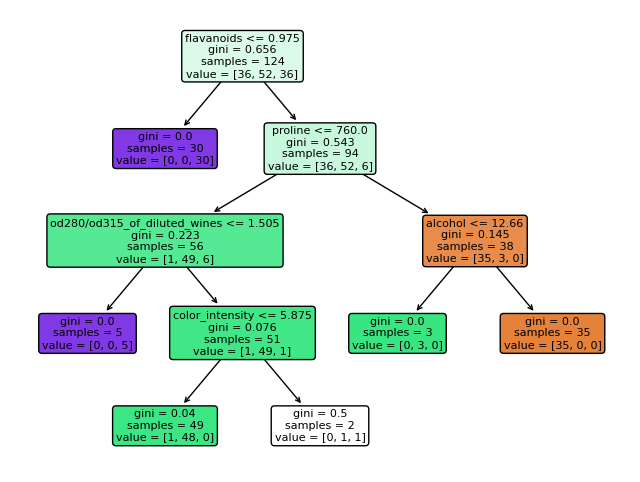

In [ ]:
#@title **Graded Assignment**
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
clf = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_grid={
        'criterion':['entropy', 'gini'],
        'splitter' : ["best", "random"],
        'min_samples_leaf':[2,4,6,8,10],
        'max_depth':[3,4,5,6]
    },
    cv=4,
    verbose=1,
    return_train_score = True
)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.best_params_)


##extra
model = clf.best_estimator_
feature_names = load_wine().feature_names
#create the tree plot
a = plot_tree(model,feature_names = feature_names, rounded = True,filled = True, fontsize=8)
#show the plot
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/cars_data.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [ ]:
df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.drop('Invoice', axis=1, inplace=True)

In [ ]:
# df.isna().sum()
df['MSRP'] = df['MSRP'].str.slice(start=1) #remove $ sign
df['MSRP'] = df['MSRP'].str.replace(",", "", regex=False) #remove , from between
df['MSRP'] = df['MSRP'].astype('int')

In [ ]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6.0,225,18,24,3880,115,197


In [ ]:
cat_feat = ['Make','Model','Type','Origin', 'DriveTrain']
df2 = pd.get_dummies(df, columns=cat_feat)
df2.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Ford,Make_GMC,Make_Honda,Make_Hummer,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_MINI,Make_Mazda,Make_Mercedes-Benz,Make_Mercury,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Pontiac,Make_Porsche,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_3.5 RL 4dr,Model_3.5 RL w/Navigation 4dr,Model_300M 4dr,Model_300M Special Edition 4dr,Model_325Ci 2dr,Model_325Ci convertible 2dr,Model_325i 4dr,Model_325xi 4dr,Model_325xi Sport,Model_330Ci 2dr,Model_330Ci convertible 2dr,Model_330i 4dr,Model_330xi 4dr,Model_350Z Enthusiast convertible 2dr,Model_350Z coupe 2dr,Model_4Runner SR5 V6,Model_525i 4dr,Model_530i 4dr,Model_545iA 4dr,Model_745Li 4dr,Model_745i 4dr,Model_9-3 Aero 4dr,Model_9-3 Aero convertible 2dr,Model_9-3 Arc Sport 4dr,Model_9-3 Arc convertible 2dr,Model_9-5 Aero,Model_9-5 Aero 4dr,Model_9-5 Arc 4dr,Model_911 Carrera 4S coupe 2dr (convert),Model_911 Carrera convertible 2dr (coupe),Model_911 GT2 2dr,Model_911 Targa coupe 2dr,Model_A4 1.8T 4dr,Model_A4 3.0 4dr,Model_A4 3.0 Quattro 4dr auto,Model_A4 3.0 Quattro 4dr manual,Model_A4 3.0 Quattro convertible 2dr,Model_A4 3.0 convertible 2dr,Model_A41.8T convertible 2dr,Model_A6 2.7 Turbo Quattro 4dr,Model_A6 3.0 4dr,Model_A6 3.0 Avant Quattro,Model_A6 3.0 Quattro 4dr,Model_A6 4.2 Quattro 4dr,Model_A8 L Quattro 4dr,Model_Accent 2dr hatch,Model_Accent GL 4dr,Model_Accent GT 2dr hatch,Model_Accord EX 2dr,Model_Accord EX V6 2dr,Model_Accord LX 2dr,Model_Accord LX V6 4dr,Model_Aeno S 4dr,Model_Aerio LX 4dr,Model_Aerio SX,Model_Alero GLS 2dr,Model_Alero GX 2dr,Model_Altima S 4dr,Model_Altima SE 4dr,Model_Amanti 4dr,Model_Ascender S,Model_Astro,Model_Avalanche 1500,Model_Avalon XL 4dr,Model_Avalon XLS 4dr,Model_Aveo 4dr,Model_Aveo LS 4dr hatch,Model_Aviator Ultimate,Model_Aztekt,Model_B2300 SX Regular Cab,Model_B4000 SE Cab Plus,Model_Baja,Model_Bonneville GXP 4dr,Model_Boxster S convertible 2dr,Model_Boxster convertible 2dr,Model_C230 Sport 2dr,Model_C240,Model_C240 4dr,Model_C32 AMG 4dr,Model_C320 4dr,Model_C320 Sport 2dr,Model_C320 Sport 4dr,Model_C70 HPT convertible 2dr,Model_C70 LPT convertible 2dr,Model_CL500 2dr,Model_CL600 2dr,Model_CLK320 coupe 2dr (convertible),Model_CLK500 coupe 2dr (convertible),Model_CR-V LX,Model_CTS VVT 4dr,Model_Camry LE 4dr,Model_Camry LE V6 4dr,Model_Camry Solara SE 2dr,Model_Camry Solara SE V6 2dr,Model_Camry Solara SLE V6 2dr,Model_Camry XLE V6 4dr,Model_Canyon Z85 SL Regular Cab,Model_Caravan SE,Model_Cavalier 2dr,Model_Cavalier 4dr,Model_Cavalier LS 2dr,Model_Cayenne S,Model_Celica GT-S 2dr,Model_Century Custom 4dr,Model_Civic DX 2dr,Model_Civic EX 4dr,Model_Civic HX 2dr,Model_Civic Hybrid 4dr manual (gas/electric),Model_Civic LX 4dr,Model_Civic Si 2dr hatch,Model_Colorado Z85,Model_Concorde LX 4dr,Model_Concorde LXi 4dr,Model_Cooper,Model_Cooper S,Model_Corolla CE 4dr,Model_Corolla LE 4dr,Model_Corolla S 4dr,Model_Corvette 2dr,Model_Corvette convertible 2dr,Model_Crossfire 2dr,Model_Crown Victoria 4dr,Model_Crown Victoria LX 4dr,Model_Crown Victoria LX Sport 4dr,Model_Dakota Club Cab,Model_Dakota Regular Cab,Model_Deville 4dr,Model_Deville DTS 4dr,Model_Diamante LS 4dr,Model_Discovery SE,Model_Durango SLT,Model_E320,Model_E320 4dr,Model_E500,Model_E500 4dr,Model_ES 330 4dr,Model_Echo 2dr auto,Model_Echo 2dr manual,Model_Echo 4dr,Model_Eclipse GTS 2dr,Model_Eclipse Spyder GT convertible 2dr,Model_Elantra GLS 4dr,Model_Elantra GT 4dr,Model_Elantra GT 4dr hatch,Model_Element LX,Model_Endeavor XLS,Model_Envoy XUV SLE,Model_Escalade,Model_Escalade EXT,Model_Escape XLS,Model_Excursion 6.8 XLT,Model_Expedition 4.6 XLT,Model_Explorer XLT V6,Model_F-150 Regular Cab XL,Model_F-150 Supercab Lariat,Model_FX35,Model_FX45,Model_Focus LX 4dr,Model_Focus SE 4dr,

In [ ]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, \
                             GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

def train_model_return_score(estimator, X_train, X_test, y_train, y_test):
    model = estimator(random_state=1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return round(score, 4)

models = [BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor]
for model in models:
    model_score = train_model_return_score(model, X_train, X_test, y_train, y_test)
    print(f"{model}:: {model_score}")

reg = AdaBoostRegressor(random_state=1)
gscv = GridSearchCV(estimator=reg,
                    param_grid={
                        'n_estimators' : [100,500,1000],
                        'learning_rate' : [0.5,1,2]
                    },
                    cv=4,
        )
gscv.fit(X_train, y_train)
print(gscv.score(X_test, y_test))
print(gscv.best_params_)


<class 'sklearn.ensemble._bagging.BaggingRegressor'>:: 0.7949
<class 'sklearn.ensemble._forest.RandomForestRegressor'>:: 0.8369
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>:: 0.827
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>:: 0.7119
0.7130800769863186
{'learning_rate': 1, 'n_estimators': 1000}


1.0
0.9444444444444444
0.8145161290322581
0.7777777777777778


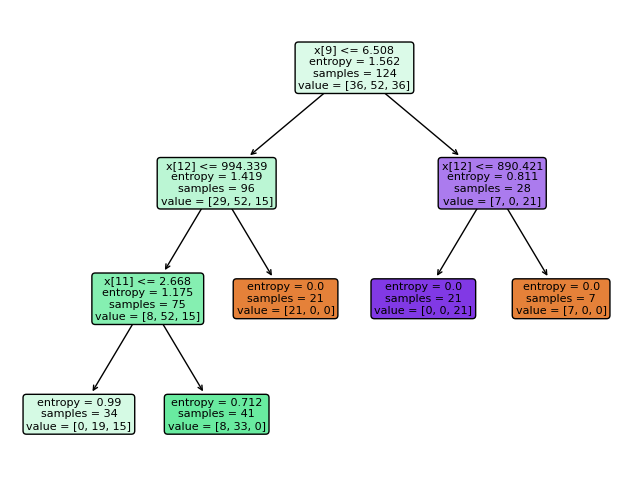

0.6774193548387096
0.5370370370370371
0.9629629629629629
{'learning_rate': 0.5, 'n_estimators': 100}
1.0
0.9814814814814815


In [ ]:
#@title **Practice Assignment**
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, _tree, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier


X, y = load_wine(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf1 = DecisionTreeClassifier(random_state=1)
clf1.fit(X_train, y_train)
print(clf1.score(X_train, y_train))
print(clf1.score(X_test, y_test))
# plot_tree(clf1, rounded = True,filled = True, fontsize=8)
# plt.show()

clf2 = DecisionTreeClassifier(
    criterion = 'entropy',
    splitter='random',
    max_depth=3,
    min_samples_split=4,
    min_impurity_decrease=0.1,
    random_state = 1
)
clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
print(clf2.score(X_test, y_test))
plot_tree(clf2, rounded = True,filled = True, fontsize=8)
plt.show()

ada_boost_clf = AdaBoostClassifier(random_state=1)
ada_boost_clf.fit(X_train, y_train)
print(ada_boost_clf.score(X_train, y_train))
print(ada_boost_clf.score(X_test, y_test))
gscv = GridSearchCV(estimator=ada_boost_clf,
                    param_grid={
                        'n_estimators' : [100,500,1000],
                        'learning_rate' : [0.5,1,2]
                    },
                    cv=4,
        )
gscv.fit(X_train, y_train)
print(gscv.score(X_test, y_test))
print(gscv.best_params_)

estimators = [
    ('bag_clf', BaggingClassifier(random_state=1)),
    ('random_for_clf', RandomForestClassifier(random_state=1)),
    ('gbclf', GradientBoostingClassifier(random_state=1))
]
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_train, y_train))
print(voting_clf.score(X_test, y_test))

# Week 9

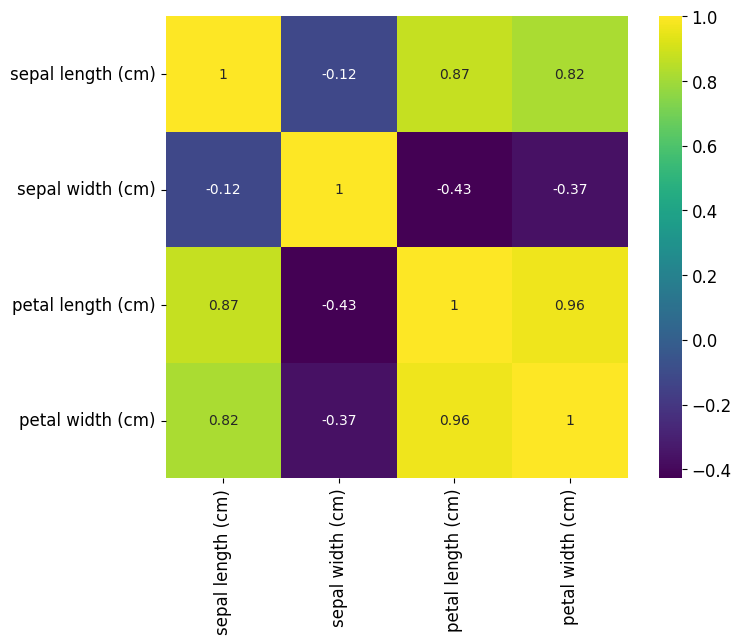

46.446182051282065
[(681.3706, 1), (152.3479517603579, 2), (78.851441426146, 3), (57.22847321428572, 4), (46.446182051282065, 5), (39.03998724608726, 6), (34.29822966507178, 7), (30.01588095238096, 8), (28.14693893387315, 9), (26.72362757237603, 10), (24.374128327812535, 11), (23.3371026867869, 12)]


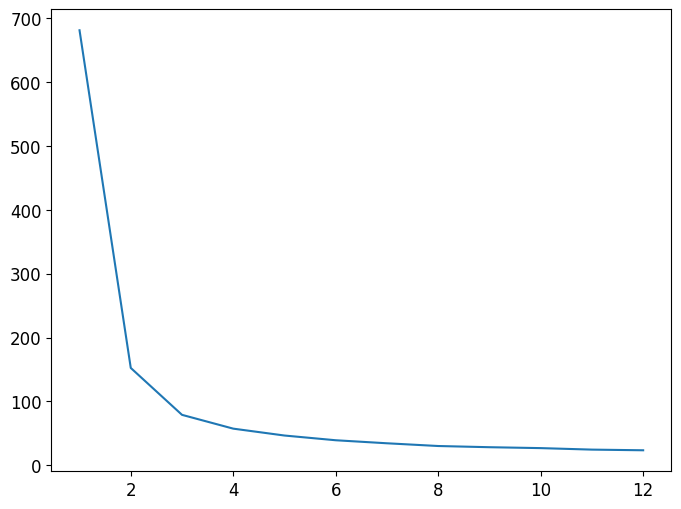

In [ ]:
#@title **Practice Assignment - 1**
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris(as_frame=True)
df = data.data
y = data.target
sns.heatmap(df.corr(), annot=True, square=True, cmap='viridis')
plt.show()
kwargs = {
    "n_clusters":5, "init":"random","n_init":50,"max_iter":500,"random_state":10
}
kmeans = KMeans(**kwargs)
kmeans.fit(df, y)
print(kmeans.inertia_)

sse = []
for k in range(1,13):
    kwargs = {"n_clusters":k, "init":"random","n_init":50,"max_iter":500,"random_state":10}
    kmeans = KMeans(**kwargs)
    kmeans.fit(df, y)
    sse.append(kmeans.inertia_)
print(list(zip(sse, range(1,13))))
plt.plot(np.arange(1,13), np.array(sse))
plt.show()

In [ ]:
#@title **Practice Assignment - 2**
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10),
                               learning_rate_init=0.2, max_iter=500,
                               random_state=1, solver='sgd'))])

In [ ]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
print(pipe[-1].out_activation_)
print(pipe[-1].coefs_[0].shape)

0.7915309446254072
0.7662337662337663
logistic
(8, 10)


In [ ]:
#@title **Graded Assignment - 1**
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape)
df.isnull().sum()

(7050, 16)


status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [ ]:
print(df['status_type'].nunique())
drop_cols = ["status_id", "status_published", 'Column1', 'Column2', 'Column3', 'Column4']
df.drop(drop_cols, axis=1, inplace=True)
df.head(2)

4


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from pandas.core.common import random_state
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score
le = LabelEncoder()
scaler = StandardScaler()
y_tr = le.fit_transform(y)
X_tr = scaler.fit_transform(X)

k = 2
kmeans = KMeans(n_clusters=k,random_state=10)
kmeans.fit(X_tr, y_tr)
print(kmeans.inertia_)
k = 4
kmeans = KMeans(n_clusters=k,random_state=10)
kmeans.fit(X_tr, y_tr)
y_pred = kmeans.predict(X_tr)
print("labels were predicted accurately at k=4 is", np.sum(y_pred == y_tr))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


48278.09824220544


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels were predicted accurately at k=4 is 4421


In [ ]:
aglo_clustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
aglo_clustering.fit(X_tr)
print(aglo_clustering.labels_)
print(aglo_clustering.n_leaves_)
print(round(accuracy_score(y_tr, aglo_clustering.labels_) * 100,3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[3 3 3 ... 3 3 3]
7050
28.496


In [ ]:
#@title **Graded Assignment - 2**
df = pd.read_csv("/content/AirQualityUCI.csv")
print(df.shape)
df.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
drop_cols = ['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16']
df.drop(drop_cols, axis=1, inplace=True)
df.dropna(how='any',inplace=True)
print(df.shape)

(9357, 13)


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', MLPRegressor(hidden_layer_sizes=(50,50,50), tol=1e-2, alpha=1e-4,solver="adam", learning_rate_init=0.1, max_iter=50, random_state=1))
])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7485, 12)
(1872, 12)


In [ ]:
pipe.fit(X_train, y_train)
corr_coef_tran = pipe.score(X_train, y_train)
print(round(corr_coef_tran,3))
corr_coef_test = pipe.score(X_test, y_test)
print((round(corr_coef_test,3)))

1.0
1.0


# Week 11

The formula for RMSLE is as follows:

$$
RMSLE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(p_i +1)-log(a_i +1))^2}
$$

where:

$n$  is the total number of observations in the (public/private) data set,

$p_i$  is the prediction of target, and

$a_i$  is the actual target for  $i$ .

$log(x)$  is the natural logarithm of  $x  \:\:(log_e(x))$ .

In [ ]:
#@title **Practice Assignment**
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [10]:
trainAndValid_df = pd.read_csv('/content/drive/MyDrive/TrainAndValid.csv', low_memory=False)
test_df = pd.read_csv('/content/drive/MyDrive/Test.csv', low_memory=False)

In [9]:
trainAndValid_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
trainAndValid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [16]:
n, f = trainAndValid_df.shape
print(n,f)

412698 53


In [13]:
trainAndValid_df[trainAndValid_df['SalesID'] == 1139246]['auctioneerID']

0    3.0
Name: auctioneerID, dtype: float64

In [14]:
cols = trainAndValid_df.columns.values
print(cols)

['SalesID' 'SalePrice' 'MachineID' 'ModelID' 'datasource' 'auctioneerID'
 'YearMade' 'MachineHoursCurrentMeter' 'UsageBand' 'saledate'
 'fiModelDesc' 'fiBaseModel' 'fiSecondaryDesc' 'fiModelSeries'
 'fiModelDescriptor' 'ProductSize' 'fiProductClassDesc' 'state'
 'ProductGroup' 'ProductGroupDesc' 'Drive_System' 'Enclosure' 'Forks'
 'Pad_Type' 'Ride_Control' 'Stick' 'Transmission' 'Turbocharged'
 'Blade_Extension' 'Blade_Width' 'Enclosure_Type' 'Engine_Horsepower'
 'Hydraulics' 'Pushblock' 'Ripper' 'Scarifier' 'Tip_Control' 'Tire_Size'
 'Coupler' 'Coupler_System' 'Grouser_Tracks' 'Hydraulics_Flow'
 'Track_Type' 'Undercarriage_Pad_Width' 'Stick_Length' 'Thumb'
 'Pattern_Changer' 'Grouser_Type' 'Backhoe_Mounting' 'Blade_Type'
 'Travel_Controls' 'Differential_Type' 'Steering_Controls']


In [40]:
pd.DataFrame(trainAndValid_df.isnull().sum())

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
saledate,0


In [41]:
trainAndValid_df['state'].isnull().sum()

0

In [24]:
trainAndValid_df['saledate'] = pd.to_datetime(trainAndValid_df['saledate'], dayfirst=False)

In [25]:
trainAndValid_df.sort_values(by='saledate', inplace=True)

In [27]:
trainAndValid_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
140257,1502329,35000.0,1300019,4155,132,99.0,1977,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
32138,1264985,20000.0,1204499,6788,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405915,6257884,16500.0,1897564,3263,149,99.0,1996,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
411890,6312473,11000.0,1796787,17231,149,99.0,2006,NaN,NaN,2012-04-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
406079,6258623,22000.0,1877704,3192,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409202,6283634,35000.0,1930870,4701,149,99.0,1998,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [28]:
df = trainAndValid_df.copy(deep=True)
df[df['MachineID'] == 1194089]['YearMade']

274835    1980
Name: YearMade, dtype: int64

In [30]:
df['saleYear'] = df['saledate'].dt.year
df['saleMonth'] = df['saledate'].dt.month
df['saleDay'] = df['saledate'].dt.day
df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
df['saleDayOfYear'] = df['saledate'].dt.dayofyear

In [31]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [38]:
df['state'] = pd.Categorical(df["state"]).codes
df['UsageBand'] = pd.Categorical(df["UsageBand"]).codes

In [39]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,-1,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
140257,1502329,35000.0,1300019,4155,132,99.0,1977,NaN,-1,1989-01-31,...,None or Unspecified,Semi U,None or Unspecified,NaN,NaN,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,-1,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
32138,1264985,20000.0,1204499,6788,132,99.0,1984,NaN,-1,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,-1,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
